# Zbiór danych Fashion MNIST składa się z 70 000 obrazów zawierających elementy ubioru podzielone na 10 klas, każdy obraz zawiera etykietę określającą zawartą na nim część garderoby. Należy zbudować perceptron wielowarstwowy do klasyfikacji obrazów Fashion MNIST.

Zbiór treningowy składa się z 60 000 obrazów, a zbiór testowy z 10 000 obrazów. Każdy obraz jest czarno-biały i ma rozmiar 28x28 pikseli.

 Do implementacji sieci neuronowych w Pythonie stosowane są głównie dwa pakiety: TensorFlow i PyTorch. Perceptron wielowarstwowy zostanie zaimplementowany za pomocą interfejsu Keras (stanowi część biblioteki TensorFlow).

# **IMPORT ODPOWIEDNICH BIBLIOTEK**

In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **WCZYTANIE ZBIORU DANYCH**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data() # interfejs keras jest dostępny poprzez tf.keras

Przy korzystaniu z aglorytmów uczenia maszynowego do rozwiązywania problemów klasyfikacji i regresji, dane były dzielone na dwa zbiory: treningowy i testowy. Tym razem dane należy podzielić na trzy zbiory: uczący, walidacyjny i testowy. Zbiór uczący wykorzystywany jest do treningu modelu, a testowy do jego ewaluacji. Zbiór walidacyjny posłuży do ewaluacji sieci neuronowej podczas treningu. Zbiór Fashion MNIST jest podzielony na zbiór uczący i testowy, natomiast wyodrębnimy 5000 obrazów ze zbioru treningowego do walidacji

Sprawdzenie wymiarów i typów danych tworzących poszczególne zestawy danych

Wyświetlenie kilkunastu obrazów

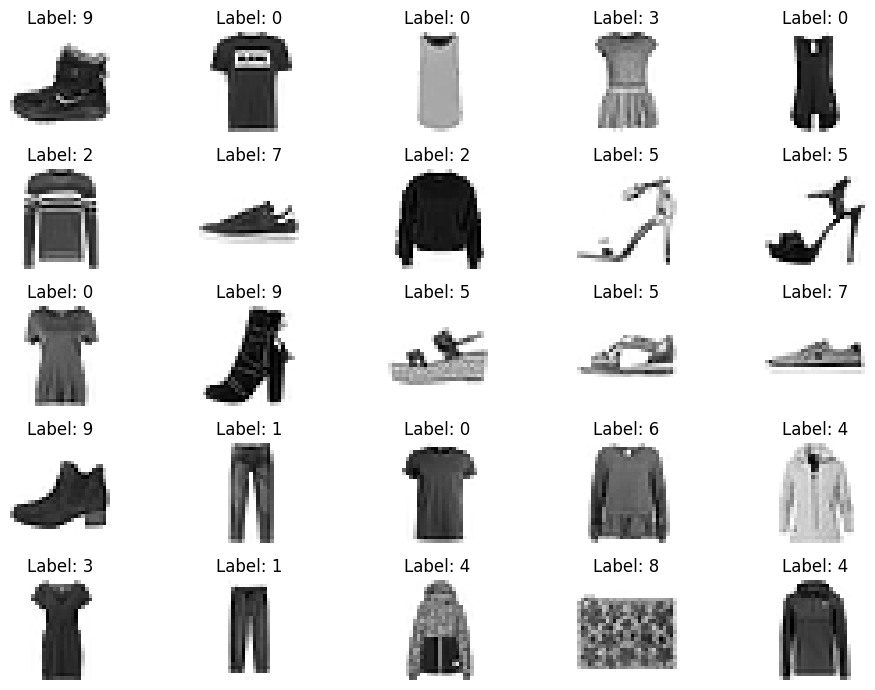

# **DATA PREPROCESSING**

Podczas wczytywania zestawu danych za pomocą modułu Keras należy pamiętać, że każdy obraz będzie reprezentowany w postaci tablicy 28x28, a nie jednowymiarowej tablicy o rozmiarze 784 (moduł Scikit-Learn). Nasycenie kolorami jest wyrażone liczbami całkowitymi.

Normalizacja odcienia pikseli do zakresu [0,1] -> dzielenie przez 255.0

Stworzenie listy nazw klas

In [ ]:
class_names = ['Koszulka', 'Spodnie', 'Sweter', 'Sukienka', 'Płaszcz',
               'Sandał', 'Koszula', 'Sneakers', 'Torebka', 'Trzewiki']

Przykłady z zestawu danych Fashion MNIST z uwzględnieniem nazw klas

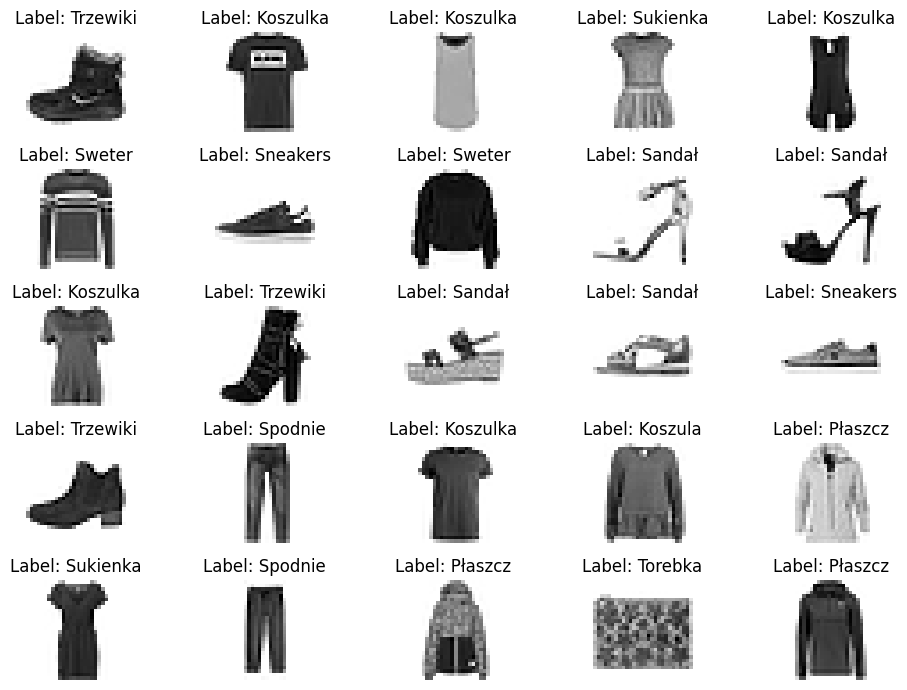

# **TWORZENIE MODELU**

Perceptron wielowarstwowy składa się z jednej warstwy wejściowej, co najmniej jednej warstwy ukrytej i warstwy wyjściowej.

Model:
*   Ziarno losowości = 42.
*   Pierwsza warstwa (InputLayer): wymiary warstwy (shape) odnoszą się do wymiarów przykładów. Keras musi znać wymiary danych wejściowych.
*   Warstwa spłaszczona (Flatten()). Ma za zadanie przekształcić każdy obiekt wejściowy w tablicę jednowymiarową -> wstępne przetworzenie danych
*   Warstwa ukryta gęsta (Dense) składająca się z 300 neuronów, która korzysta z funkcji aktywacji ReLU (każda warswa Dense zarządza swoją macierzą wag oraz wektorem obciążeń)
*   Warstwa ukryta gęsta (Dense) składająca się z 100 neuronów, która korzysta z funkcji aktywacji ReLU
*   Warstwa wyjściowa gęsta (Dense) składająca się z 10 neuronów (po jednym na każdą klasę) z wyznaczoną funkcją aktywacji softmax, ponieważ klasy wykluczają się wzajemnie


Jaka jest liczba parametrów w poszczególnych warstwach modelu?

Metoda summary() wyświetla wszystkie warstwy modelu

Można wyświetlić listę warstw modelu za pomocą atrybutu layers lub uzyskać dostęp do warstwy przy użyciu metody get_layer()

# **KOMPILOWANIE MODELU**

Po utworzeniu modelu należy wywołać metodę compile(), by ocenić funkcję straty (porównanie różnicy między oczekiwanym a uzyskanym wynikiem) i optymalizator.

*  funkcja straty: sparse_categorical_crossentropy (etykiety rzadkie, klasy wykluczają się wzajemnie)
*  optymalizator: sgd (trenowanie modelu za pomocą algorytmu stochastycznego spadku wzdłuż gradientu -> algorytm propagacji wstecznej), domyślny współczynnik uczenia wynosi 0.01
*  wskaźnik: accuracy (konstruowany jest klasyfikator, warto zmierzyć jego dokładność podczas uczenia i oceniania)




funkcja straty: sparse_categorical_crossentropy: mamy do czynienia z etykietami rzadkimi (dla każdego przykładu występuje tylko indeks klasy docelowej), klasy wykluczają się wzajemnie. W przypadku pojedynczego prawdopodobieństwa przynależności do klasy w każdym przykładzie, należałoby użyć funkcji straty "categorical_crossentropy". W przypadku klasyfikacji binarnej lub wieloetykietowej klasyfikacji binarnej funkcję aktywacji "softmax" w warstwie wyjściowej należy zastąpić funkcją 'sigmoid", a w miejscu funkcji straty należałoby umieścić "binary_crossentropy"

# **TRENOWANIE MODELU**

Należy wywołać metodę fit():
*   cechy wejściowe (X_train)
*   Klasy docelowe (y_train)
*   Liczba epok (epochs) = 30
*   Przebieg walidacyjny




Keras zmierzy funkcję straty i dodatkowe wskaźniki na końcu każdej epoki -> możliwość określenia rzeczywistej wydajności modelu. Jeżeli skuteczność dla zestawu uczącego przewyższa wydajność dla zestawu walidacyjnego, to model najprawdopodobniej uległ przetrenowaniu.

W każdej epoce uczenia Keras wyświetla liczbę dotychczas przetworzonych minigrup po lewej stronie od paska postępu. Rozmiar grupy wynosi domyślnie 32, zbiór uczący zawiera 55 000 obrazów -> na każdą epokę przypada 1719 grup (1718 o rozmiarze 32 i jedna o rozmiarze 24)

Metoda fit() zwraca obiekt History zawierający parametry uczenia (history.params), listę epok (history.epoch), słownik (history, history) z funkcją straty i dodatkowymi wskaźnikami zmierzonymi na końcu każdej epoki w fazie trenowania i walidacji.

# **KRZYWE UCZENIA**

Należy wykorzystać słownik (history.history). Krzywe uczenia: średnia funkcja straty uczenia i dokładność zmierzone w każdej epoce dla zestawu treningowego i walidacyjnego

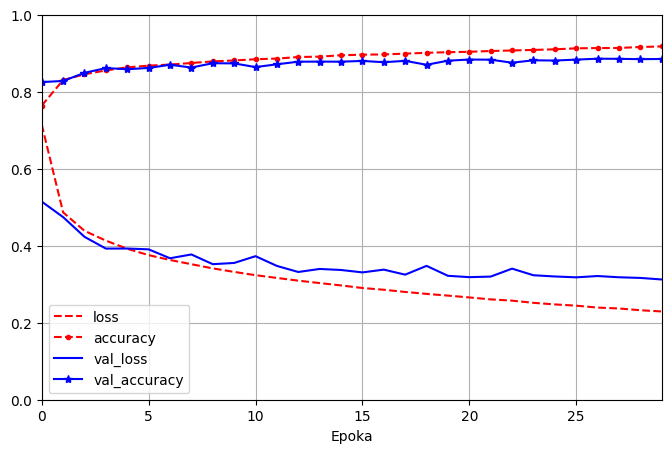

Jak zinterpretować uzyskane wyniki?

Zapobieganie przeuczeniu modelu:

*   zmniejszenie liczby epok
*   wprowadzenie callbacks
*   wyłączenie części neuronów (Dropout layers)



# W przypadku niezadowalającej skuteczności modelu -> strojenie hiperparametrów:
*   współczynnik uczenia (optimizer = tf.keras.optimizers.SGD(learning_rate = ...))
*   optymalizator
*   liczba warstw
*   liczba neuronów w warstwie
*   rozmiar minigrupy (w metodzie fit() za pomocą argumentu batch_size, domyślna wartość to 32)
*   funkcja aktywacji


Po uzyskaniu wystarczającej dokładności dla zbioru walidacyjnego, należy sprawdzić model na zbiorze testowym w celu uzyskania błędu uogólnania.




# **OCENA MODELU**

# **PROGNOZY MODELU**

# **DOSTRAJANIE HIPERPARAMETRÓW**

Strojenie hiperparametrów w modelach Keras -> biblioteka Keras Tuner. Jest zingetegrowana z TensorBoard.


In [ ]:
!pip install -q -U keras-tuner

Import keras_tuner

In [ ]:
import keras_tuner as kt

Funkcja budująca, kompilująca i zwracająca model. Funkcja musi zawierać obiekt kt.HyperParameters jako argument,którego można użyć do zdefiniowania hiperparametrów:

*   liczba warstw ukrytych, n_hidden (zakres wartości od 0 do 8, zwraca wartość domyślną równą 2, gdy nie jest wyznaczona wartość domyślna to zwracana jest wartość min_value). Następuje sprawdzenie czy hiperparametr n_hidden znajduje się już w obiekcie, jeśli tak, to zwaraca jego wartość. W przeciwnym razie rejestruje nowy hiperparametr typu int, n_hidden -> zakres wartości wyżej.
*   liczba neuronów w każdej warstwie, n_neurons (minamalna liczba neuronów to 16, a maksymalna to 256. Podobnie rejestrowany jako n_hidden
*   współczynnik uczenia, learning_rate (typ float, zakres 10^4 do 10^2, sampling = "log"),
*   typ optymalizatora, optimizer (sgd, adam)

Druga część funkcji - konstrukcja modelu za pomocą wartości hiperparametrów:
*   Model Sequential
*   Warstwa spłaszczona Flatten,
*   Liczba Warstw ukrytych gęstych (Dense) -> hiperparametr n_hidden, funkcja aktywacji ReLU
*   Warstwa wyjściowa gęsta (Dense) składająca się z 10 neuronów (po jednym na każdą klasę) z wyznaczoną funkcją aktywacji softmax




Wyszukiwanie losowe (np. kt.RamdomSearch) przekazując funkcję budującą, kompilującą i zwracającą model. Klasa ma przeprowadzać 5 prób, w każdej z nich buduje model za pomocą hiperaparametrów losowanych z zadanych zakresów, a następnie uczy ten model przez 10 epok, objective = "val_accuracy" -> klasa RandomSearch będzie preferować modele o wyższej dokładności walidacji, seed=42.

Najlepsze modele i hiperparametry (get_best_hyperparameters())

Dokładność walidacji

Uczenie najlepszego modelu

Ocena modelu na zbiorze testowym

Predykcja modelu

# **DOSTRAJANIE ZMODYFIKOWANEGO ZESTAWU HIPERPARAMETRÓW**